# Introduction

Well, this is my very first commented notebook for data science. Note that I wrote "commented notebook" because I already have done several more, but this is the very fisrt time I comment them like this.

In this notebook I will be working with a classic dataset for machine learning: the Titanic survival dataset. As accurately described by it's name, this dataset records personal information for known passengers in the moment of the Titanic sinkink and if they survived or not.

My intentions are to comment my though process and how I percieve insights and data as I explore it, then I will fit a classification model to predict if, given raw or processed features, a ceratin person would survive or not.

In [1]:
# First of all, I import the basic libraries for EDA (Exploration data analysis)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')

In [3]:
# I load the data from the csv file
data = pd.read_csv('titanic.csv')

# Secion 1: Exploring data

## Section 1.1: checking features info and data consistency

First, a quick glance of the data is needed. We have to see which features we have, which type they are and do a quick check on the data consitency

In [4]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


We see that only two of the features are non numerical: Name and Sex.
Survived feature is our target feature.
Before assuming how to treat the other features we need to have a exploration of them

In [6]:
# checking if any feature has missing values
data.isna().any()

Survived                   False
Pclass                     False
Name                       False
Sex                        False
Age                        False
Siblings/Spouses Aboard    False
Parents/Children Aboard    False
Fare                       False
dtype: bool

No feature has missing data. This avoids us from working with inconsistent data.

## Section 1.2: Exploratory analysis

First, let's understand our target feature

In [7]:
print('data type is: {}'.format(data.Survived.dtype))

data type is: int64


In [8]:
# checking which values this features can take
data.Survived.unique()

array([0, 1], dtype=int64)

In [9]:
# checking value distribution
data.Survived.value_counts()

0    545
1    342
Name: Survived, dtype: int64

In [10]:
# checking value distribution
data.Survived.value_counts(normalize=True)

0    0.614431
1    0.385569
Name: Survived, dtype: float64

This is a binary feature, where value 1 is given for those who survived and 0 for those whose didn't. 
By counting how many people survived and normalizing (scaling data to range [0-1]) we see that roughtly 39% passengers survived the Titanic tragedy. 

#### Our next question will be: which features are important factors to decide who survived?

Let's explore features one by one

#### Pclass

In [11]:
print('data type is: {}'.format(data.Pclass.dtype))

data type is: int64


In [12]:
data.Pclass.unique()

array([3, 1, 2], dtype=int64)

Text(0, 0.5, 'Percentage of passengers')

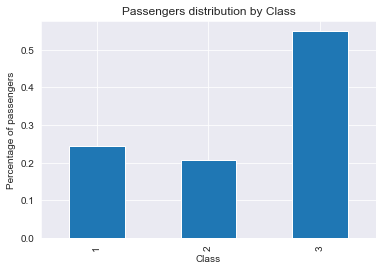

In [13]:
data.Pclass.value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title('Passengers distribution by Class')
plt.xlabel('Class')
plt.ylabel('Percentage of passengers')

There are 3 classes for passengers. We can assume 1st class is the best one and 3rd class is the lowest one (following actual classification for trips). Third class is the majority class, having more than a half of the passengers. Second class is the class with lowest cuantity of passengers.

In [14]:
from statsmodels.graphics.mosaicplot import mosaic

In [15]:
data.groupby(['Pclass','Survived']).Name.count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           368
        1           119
Name: Name, dtype: int64

[Text(0, 0, 'Not Survived'), Text(0, 0, 'Survived')]

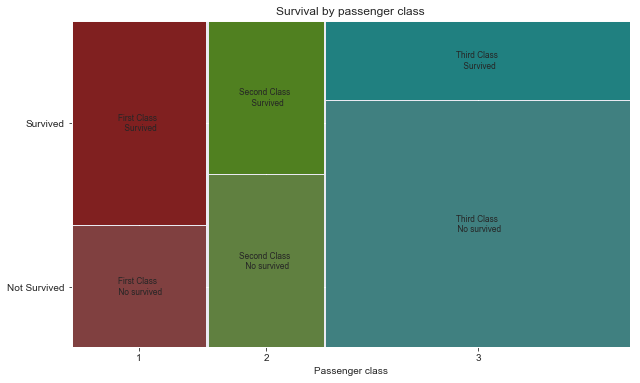

In [16]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
mosaic(data.groupby(['Pclass','Survived']).Name.count(), labelizer=lambda k: {
                                                                    ('1','0'): '''First Class \n No survived''',
                                                                    ('1','1'): '''First Class \n Survived''',
                                                                    ('2','0'): '''Second Class \n No survived''',
                                                                    ('2','1'): '''Second Class \n Survived''',
                                                                    ('3','0'): '''Third Class \n No survived''',
                                                                    ('3','1'): '''Third Class \n Survived'''
                                                                   }[k],
       title='Survival by passenger class',
       ax=ax
      )
ax.set_xlabel('Passenger class')
ax.set_yticklabels(['Not Survived','Survived'])

When looking at Survival distribution among Classes we see a clear tendency: the better the class, the higher the probability of surviving.

The mosaic plot show us this insights using relative statistics for each class. It do not show how big or small is the poblation for each passenger class. for this we would need another plot.

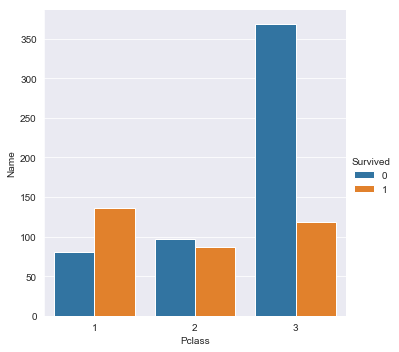

In [17]:
sns.catplot(x='Pclass', y='Name', hue='Survived',
            data= data.groupby(['Pclass','Survived']).Name.count().reset_index(),
            kind='bar'
           )

Looking at this plot we see that the amount of people who survived is relatively similar tru classes.

We can say that having a better class would give a higger probability of survival, but that would not be the only imporant feature 

#### Name

In [18]:
print('data type is: {}'.format(data.Name.dtype))

data type is: object


In [20]:
data.Name.nunique()

887

Feature "Name", as it says, refers to the names of passengers. This feature is unique to each passenger and would not give useful patterns for the model, so I am discarding it.

#### Sex

In [21]:
print('data type is: {}'.format(data.Sex.dtype))

data type is: object


In [24]:
data.Sex.unique()

array(['male', 'female'], dtype=object)

Feature 'Sex' is a binary feature which indicates if passenger was male or female

Text(0, 0.5, 'Percentage of passengers')

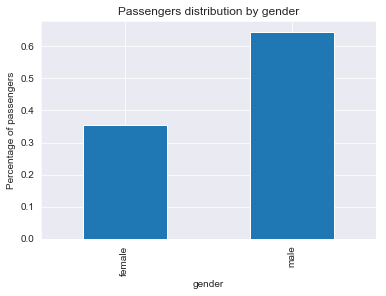

In [26]:
data.Sex.value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title('Passengers distribution by gender')
plt.xlabel('gender')
plt.ylabel('Percentage of passengers')

Male passengers to female passengers ratio was 2:1. Let's see how this distribution affected the surviving rate. 

In [27]:
from statsmodels.graphics.mosaicplot import mosaic

In [28]:
data.groupby(['Sex','Survived']).Name.count()

Sex     Survived
female  0            81
        1           233
male    0           464
        1           109
Name: Name, dtype: int64

[Text(0, 0, 'Not Survived'), Text(0, 0, 'Survived')]

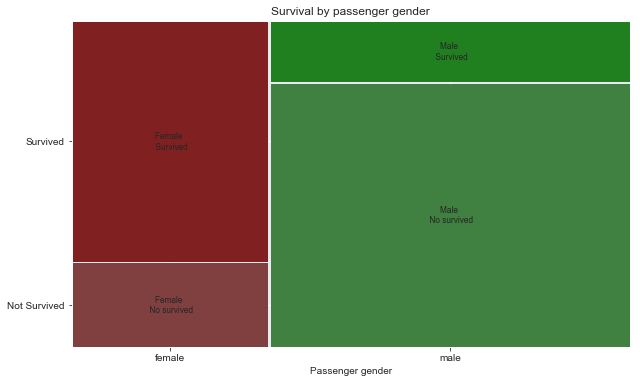

In [35]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
mosaic(data.groupby(['Sex','Survived']).Name.count(), labelizer=lambda k: {
                                                                    ('male','0'): '''Male \n No survived''',
                                                                    ('male','1'): '''Male \n Survived''',
                                                                    ('female','0'): '''Female \n No survived''',
                                                                    ('female','1'): '''Female \n Survived''',
                                                                   }[k],
       title='Survival by passenger gender',
       
       ax=ax
      )
ax.set_xlabel('Passenger gender')
ax.set_yticklabels(['Not Survived','Survived'])

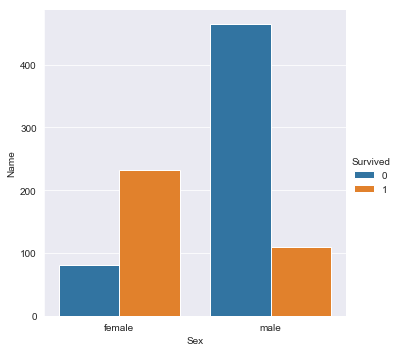

In [36]:
sns.catplot(x='Sex', y='Name', hue='Survived',
            data= data.groupby(['Sex','Survived']).Name.count().reset_index(),
            kind='bar'
           )

In [37]:
data.groupby(['Sex','Survived']).Name.count()

Sex     Survived
female  0            81
        1           233
male    0           464
        1           109
Name: Name, dtype: int64

The surviving ratio for female was higher than for males. Male surviving ratio was about 1/5. Female surviving ratio was about 3/4.

We can infer that women had priority when they were leaving the ship. This corresponds the code of conduct where women and child security would be prioritized when dealing with life-threatenign situations.

#### now, how this related to the passenger class? Do women from higher classes have even more survival opportunity than other women?

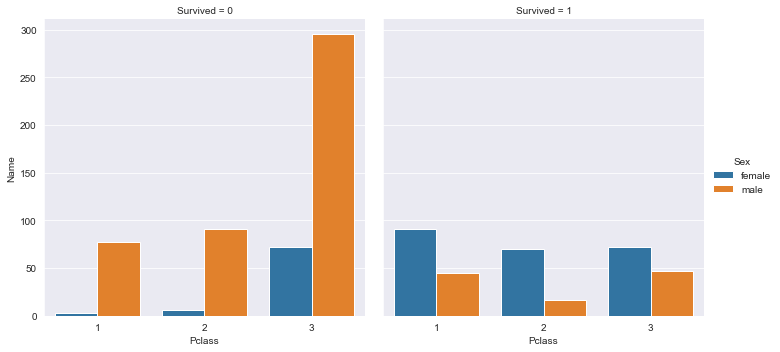

In [66]:
sns.catplot(x='Pclass',
            y='Name',
            hue='Sex',
            col='Survived',
            data=data.groupby(['Pclass','Sex','Survived']).Name.count().reset_index(),
            kind='bar',
           )

With these plots we see that the women from higher classes have a higher probability of survival, but in terms of quantity each class has a similar number of females who survived.

#### Age

In [67]:
print('data type is: {}'.format(data.Age.dtype))

data type is: float64


In [68]:
data.Age.unique()

array([22.  , 38.  , 26.  , 35.  , 27.  , 54.  ,  2.  , 14.  ,  4.  ,
       58.  , 20.  , 39.  , 55.  , 23.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 24.  , 40.  , 48.  , 18.  , 66.  , 42.  , 21.  ,
        3.  , 30.  , 16.  ,  7.  , 49.  , 29.  , 65.  , 46.  , 28.5 ,
        5.  , 11.  , 45.  , 64.  , 17.  , 32.  , 25.  ,  0.83, 33.  ,
       59.  , 71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  ,
       36.5 , 51.  , 55.5 , 40.5 , 44.  ,  1.  , 60.  , 61.  , 56.  ,
       50.  , 36.  , 45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 57.  ,
       23.5 ,  0.92, 43.  , 10.  , 13.  ,  0.75, 69.  , 53.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Feature 'Age' is a discrete feature which indicates the passenger's age

In [72]:
data.Age.describe()

count    887.000000
mean      29.471443
std       14.121908
min        0.420000
25%       20.250000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

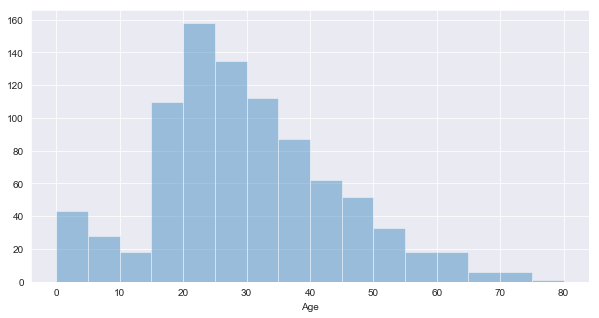

In [79]:
g = sns.distplot(a= np.round(data.Age), bins=16, kde=False)
g.figure.set_size_inches(10,5)

From this distribution we see people between 20and 40 has more than 50% of the total data

Text(0.5, 1.0, 'Age distribution by Survival')

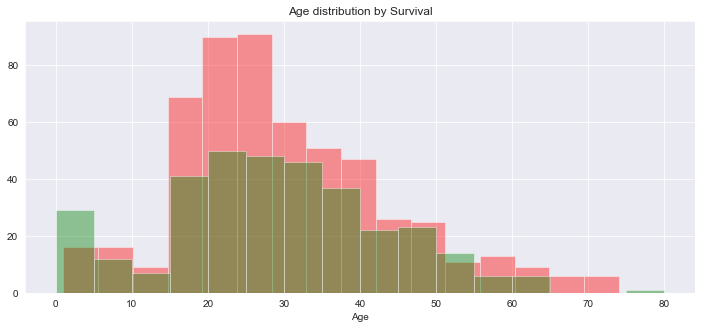

In [119]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.distplot(a= np.round(data.query('Survived==0').Age), bins=16, kde=False, color='red', ax=ax)
sns.distplot(a= np.round(data.query('Survived==1').Age), bins=16, kde=False, color='green', ax=ax)
plt.title('Age distribution by Survival')

Text(0.5, 1.0, '')

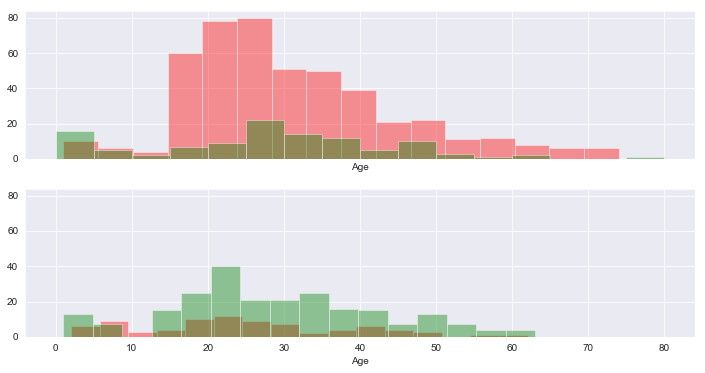

In [127]:
fig, axs = plt.subplots(2,1, figsize=(12,6), sharex=True, sharey=True)
sns.distplot(a= np.round(data.query('Sex=="male"').query('Survived==0').Age), bins=16, kde=False, ax = axs[0], color='red')
sns.distplot(a= np.round(data.query('Sex=="male"').query('Survived==1').Age), bins=16, kde=False, ax = axs[0], color='green')
sns.distplot(a= np.round(data.query('Sex=="female"').query('Survived==0').Age), bins=16, kde=False, ax = axs[1], color='red')
sns.distplot(a= np.round(data.query('Sex=="female"').query('Survived==1').Age), bins=16, kde=False, ax = axs[1], color='green')
axs[0].set_title('')
axs[1].set_title('')

Given this plots we can see that children (below 15 years) for both genders have a high probability of renewal.
Cuts or groups can be done for similar ages.

#### How about we group similar ages and make bins?

In [135]:
cuts = [0,15,30,50,100]
labels = ['Children', 'Young','Adult', 'Senior']

In [136]:
data['Age_group'] =  pd.cut(data.Age,
       bins=cuts,
       right=True,
       labels=labels
      )

Text(4.050000000000004, 0.5, 'Count')

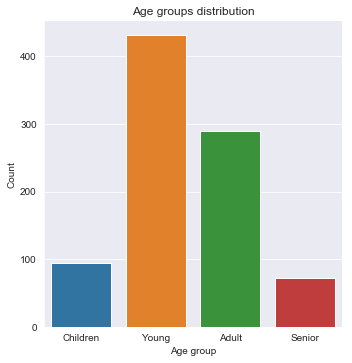

In [147]:
sns.catplot(x='index', y ='Age_group', data=data.Age_group.value_counts().reset_index(), kind='bar')
plt.title('Age groups distribution')
plt.xlabel('Age group')
plt.ylabel('Count')

In [149]:
data.Age_group.value_counts().reset_index()

,index,Age_group
0,Young,431
1,Adult,290
2,Children,94
3,Senior,72


Text(25.991597222222218, 0.5, 'Count')

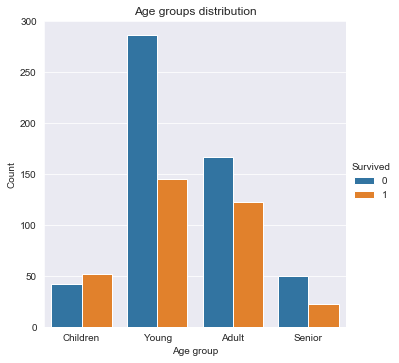

In [158]:
sns.catplot(y='Name', x ='Age_group', hue='Survived',
            data=data.groupby(['Age_group','Survived'], as_index=False).count(), kind='bar')
plt.title('Age groups distribution')
plt.xlabel('Age group')
plt.ylabel('Count')

Text(406.6246354166666, 0.5, 'Count')

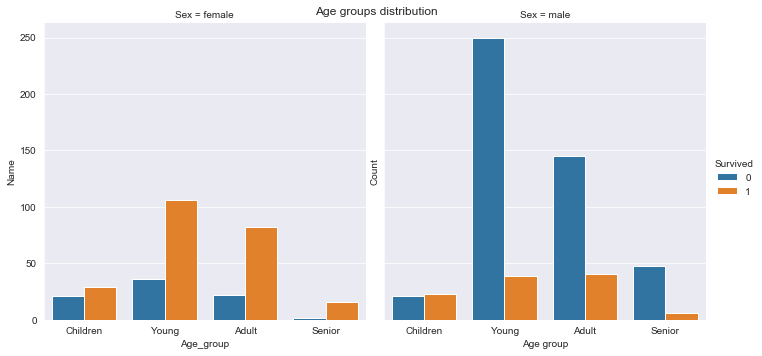

In [170]:
sns.catplot(y='Name', x ='Age_group', hue='Survived', col='Sex',
            data=data.groupby(['Age_group','Survived','Sex'], as_index=False).count(), kind='bar')
plt.suptitle('Age groups distribution')
plt.xlabel('Age group')
plt.ylabel('Count')

This grouping seems to work well.  We can see that children where the group with the highest survival probability within males.